# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [75]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


pd.set_option('display.max_colwidth', 200)   # Limit to 100 characters


In [33]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [34]:

df = pd.DataFrame()
df["reviews"] = reviews
df.head(20)

,reviews
0,"✅ Trip Verified | I recently travelled from Munich to London with British Airways, and it turn..."
1,"Not Verified | I paid for seats 80 A and B on my flight from Heathrow to Boston on the A380, pa..."
2,"Not Verified | The flight wasn’t that bad, although the Inflight entertainment wasn’t great, the..."
3,✅ Trip Verified | I decided to treat myself and my teenage daughter to World Traveller Plus on ...
4,"Not Verified | I was very impressed with their efficient boarding, the relatively (compared to ..."
5,Not Verified | The flight scheduled at 1840 left 2hours 40 minutes alter due to late arrival of...
6,✅ Trip Verified | I have been flying BA for over 15 years. I was an American Airlines FF and g...
7,✅ Trip Verified | On arriving at Mexico Airport we were told that the flight was delayed becau...
8,✅ Trip Verified | I have flown British Airways for many years and still do so regularly. In on...
9,"Not Verified | We bought tickets for a Geneva-London flight, but when we got to the airport we w..."


In [35]:
df.to_csv("data/BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Data Cleaning

In [92]:

# Clean common classes
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified', '')
df['reviews'] = df['reviews'].str.replace('Verified Review', '')
df['reviews'] = df['reviews'].str.replace('First Class', '')
df['reviews'] = df['reviews'].str.replace('Business Class', '')
df['reviews'] = df['reviews'].str.replace('Economy Class', '')
df['reviews'] = df['reviews'].str.replace('Premium Economy', '')

# removing any special characters, double spaces, tabs etc.
df['reviews'] = df['reviews'].str.replace('[^\w\s\.]','')
# Remove special characters and punctuation
df['reviews'] = df['reviews'].str.replace(r'[^a-z0-9\s]', '')  # Keep only letters, numbers, and spaces


df['reviews'] = df['reviews'].str.replace(r'(', '') # remove parentheses
df['reviews'] = df['reviews'].str.replace(r')', '') # remove parentheses
df['reviews'] = df['reviews'].str.replace(r'|', '') # remove pipe characters
df['reviews'] = df['reviews'].str.replace(r'.', '') # remove pipe characters
df['reviews'] = df['reviews'].str.replace(r',', '') # remove pipe characters
df['reviews'] = df['reviews'].str.replace(r'-', '') # remove parentheses






# Convert to lowercase
df['reviews'] = df['reviews'].str.lower()

# Clean extra whitespace after all replacements
df['reviews'] = df['reviews'].str.strip()
df['reviews'] = df['reviews'].str.replace(r'\s+', ' ')  # Multiple spaces to single space


# Dropping na and duplicates
df = df.dropna()
df = df.drop_duplicates()

df.to_csv("data/BA_reviews.csv", index=False)
df


,reviews,vader_prediction
0,i recently travelled from munich to london with british airways and it turned into an absolute nightmare our troubles began with their malfunctioning app despite checking in successfully i was una...,negative
1,not verified i paid for seats 80 a and b on my flight from heathrow to boston on the a380 paying for premium economy seats upon arrival at the airport the ticket agent said i was not healthy eno...,negative
2,not verified the flight wasn’t that bad although the inflight entertainment wasn’t great the screen was very oldfashioned it was hard to operate in the dark as the touch screen wasn’t working at ...,positive
3,i decided to treat myself and my teenage daughter to world traveller plus on the return leg of our canada holiday paying hundreds of pounds extra to do so only to end up spending nine and a half h...,negative
4,not verified i was very impressed with their efficient boarding the relatively compared to air canada comfortable seats and the quality of the food drinks and snacks frequently offered overall a...,positive
...,...,...
3877,flew lhr vie return operated by bmi but ba aircraft a319 aircraft was clearly new and very clean the crew were smiling friendly and helpful no inflight entertainment but not a problem on this sho...,positive
3878,lhr to ham purser addresses all club passengers by name boarding a little late but left on time food good for short flight overall excellent,positive
3879,my son who had worked for british airways urged me to fly british airways to kansas city he recommended me to join the executive club i went ahead and booked my flight back in may very reasonable ...,positive
3880,london citynew york jfk via shannon on a318 but had really nice seats and professional crew meal served was very tasty and fresh overall a very good flight would use this airline again,positive


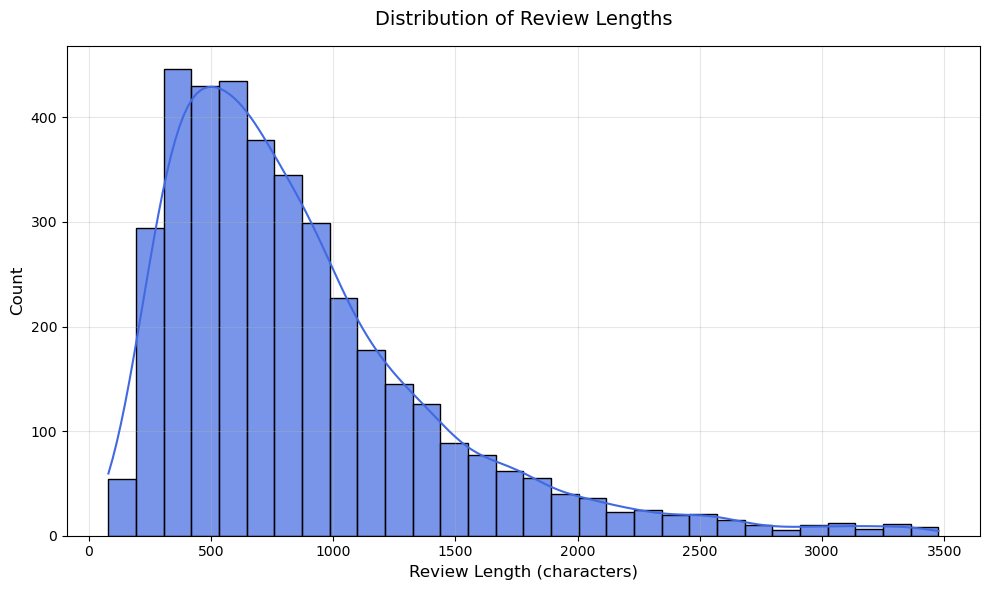

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns


df['txt_length'] = df['reviews'].str.len()

# Create figure with specific size
plt.figure(figsize=(10, 6))

# Create the histogram plot with enhanced parameters
sns.histplot(data=df, 
            x='txt_length',
            bins=30,
            kde=True,
            color='royalblue',
            alpha=0.7)

# Customize the plot
plt.title('Distribution of Review Lengths', fontsize=14, pad=15)
plt.xlabel('Review Length (characters)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Insights

    The peak of the distribution appears to be around 400-1000 characters, suggesting this is the most typical review length.
    It suggests that most users prefer to write concise reviews, while a smaller subset writes more detailed, lengthy reviews.



# Sentment Analysis

For sentiment analysis, TextBlob is a commonly used library, It calculates  the polarity to determine sentiment. However, its accuracy is considered moderate. For more precise accuracy, there are machine learning techniques designed specifically for sentiment analysis. 
For example:"

**VADER (Valence Aware Dictionary and Sentiment Reasoner):** 

    Is specifically designed for analyzing sentiments in social media text and has been trained on such data.
    VADER uses a combination of a sentiment lexicon (a predefined list of words with associated sentiment scores) and a set of grammatical rules to determine the sentiment of a text.
    
    * a positive sentiment, compound ≥ 0.05.
    * a negative sentiment, compound ≤ -0.05.
    * a neutral sentiment, the compound is between -0.05, 0.05



# Applaying VADER on Britsh Airlines Reviews

In [94]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings


In [95]:
# if not installed, its necessary to install vaderSentiment
#!pip install vaderSentiment

# Download the lexicon
nltk.download("vader_lexicon") 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jmari\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Understanding VADER

In [96]:
# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# Example
sentence = "VADER is the best tool for sent/ment analysis!"
result = sent_analyzer.polarity_scores(sentence)

result

{'neg': 0.0, 'neu': 0.609, 'pos': 0.391, 'compound': 0.6696}

The result shows that the sentence does not have any negative information (neg=0). It has some neutral and positive tones (neu=0.609 and pos=0.391). However, the overall sentiment is positive, because compound > 0.05


In [97]:
#Loading Reviews
df = pd.read_csv('./data/BA_reviews.csv')
df.head(50)

,reviews,vader_prediction
0,i recently travelled from munich to london with british airways and it turned into an absolute nightmare our troubles began with their malfunctioning app despite checking in successfully i was una...,negative
1,not verified i paid for seats 80 a and b on my flight from heathrow to boston on the a380 paying for premium economy seats upon arrival at the airport the ticket agent said i was not healthy eno...,negative
2,not verified the flight wasn’t that bad although the inflight entertainment wasn’t great the screen was very oldfashioned it was hard to operate in the dark as the touch screen wasn’t working at ...,positive
3,i decided to treat myself and my teenage daughter to world traveller plus on the return leg of our canada holiday paying hundreds of pounds extra to do so only to end up spending nine and a half h...,negative
4,not verified i was very impressed with their efficient boarding the relatively compared to air canada comfortable seats and the quality of the food drinks and snacks frequently offered overall a...,positive
5,not verified the flight scheduled at 1840 left 2hours 40 minutes alter due to late arrival of incoming aircraft from naples as a result i missed a connection from istanbul to dubai nothing unusu...,negative
6,i have been flying ba for over 15 years i was an american airlines ff and gave it up for ba i am a gold member on ba and have been for over 10 years here are the things i have noticed over the las...,positive
7,on arriving at mexico airport we were told that the flight was delayed because the aircraft had broken down and the replacement aircraft from lhr was about six hours late when we eventually manage...,negative
8,i have flown british airways for many years and still do so regularly in one of my last flights this past summer between paris and boston british booked me on a connecting flight between paris and...,negative
9,not verified we bought tickets for a genevalondon flight but when we got to the airport we were told that the airline had oversold tickets on our flight and that passengers on an earlier cancelle...,negative


In [98]:

# Create an instance of SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

# function label_output labels the output based on compound
def label_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound'] >= 0.05):
    polarity = "positive"

  elif(output_dict['compound'] <= -0.05):
    polarity = "negative"

  return polarity


# Function sentment analyzes the text and returns the compound
def sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return label_output(output_dict)



In [99]:
# Applygint in both datasets
df["vader_prediction"] = df["reviews"].apply(sentiment)
df.head(10)



,reviews,vader_prediction
0,i recently travelled from munich to london with british airways and it turned into an absolute nightmare our troubles began with their malfunctioning app despite checking in successfully i was una...,negative
1,not verified i paid for seats 80 a and b on my flight from heathrow to boston on the a380 paying for premium economy seats upon arrival at the airport the ticket agent said i was not healthy eno...,negative
2,not verified the flight wasn’t that bad although the inflight entertainment wasn’t great the screen was very oldfashioned it was hard to operate in the dark as the touch screen wasn’t working at ...,positive
3,i decided to treat myself and my teenage daughter to world traveller plus on the return leg of our canada holiday paying hundreds of pounds extra to do so only to end up spending nine and a half h...,negative
4,not verified i was very impressed with their efficient boarding the relatively compared to air canada comfortable seats and the quality of the food drinks and snacks frequently offered overall a...,positive
5,not verified the flight scheduled at 1840 left 2hours 40 minutes alter due to late arrival of incoming aircraft from naples as a result i missed a connection from istanbul to dubai nothing unusu...,negative
6,i have been flying ba for over 15 years i was an american airlines ff and gave it up for ba i am a gold member on ba and have been for over 10 years here are the things i have noticed over the las...,positive
7,on arriving at mexico airport we were told that the flight was delayed because the aircraft had broken down and the replacement aircraft from lhr was about six hours late when we eventually manage...,negative
8,i have flown british airways for many years and still do so regularly in one of my last flights this past summer between paris and boston british booked me on a connecting flight between paris and...,negative
9,not verified we bought tickets for a genevalondon flight but when we got to the airport we were told that the airline had oversold tickets on our flight and that passengers on an earlier cancelle...,negative


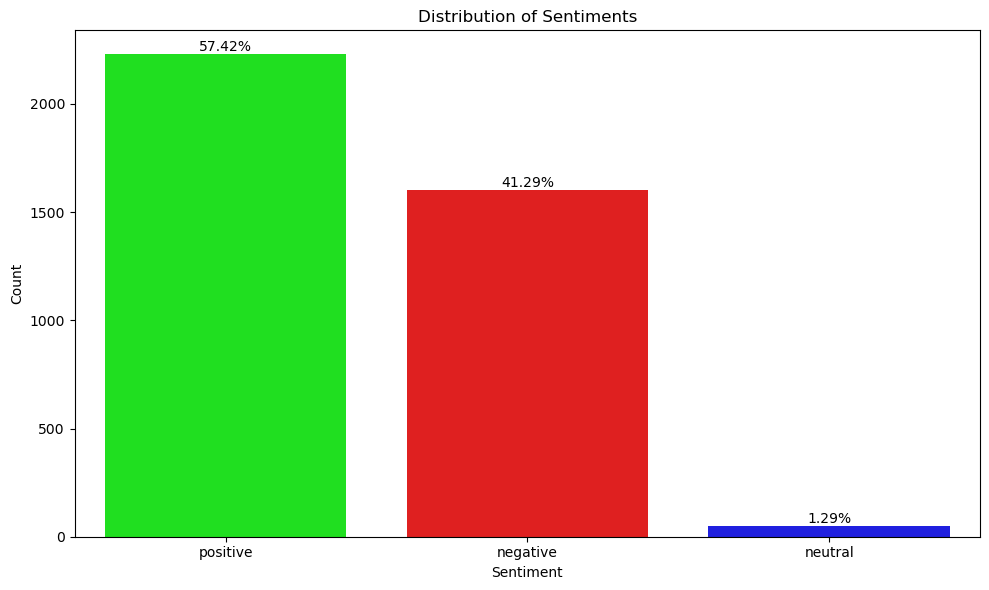

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with one subplot
plt.figure(figsize=(10, 6))

# Analyzing the distribution of sentiments
sentiments = df['vader_prediction'].value_counts()

# Defining custom color palettes
colors = {
    'negative': "#FF0000",  # Red for Negative sentiment
    'neutral': "#0000FF",   # Blue for Neutral sentiment
    'positive': "#00FF00"   # Green for Positive sentiment
}

# Plotting the distribution of sentiments
ax = sns.barplot(x=sentiments.index, y=sentiments.values, palette=colors)

# Calculating and adding percentage labels
total_values = sum(sentiments.values)
for i, v in enumerate(sentiments.values):
    percentage = round(v / total_values * 100, 2)
    plt.text(i, v + 1, f"{percentage}%", ha='center', va='bottom', color='black')

# Setting titles and labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Adjust layout and display
plt.tight_layout()
plt.show()


# Insight
The plot reveals a small polarized distribution of opinions. The majority of responses (57.42%) express positive sentiments, indicating generally favorable reactions from users. However, there is also a substantial negative sentiment presence, accounting for 41.29% of the total responses.
Analyzing the specific concerns raised in these negative responses, it is possible to identify key areas for improvement, develop targeted solutions, and potentially convert dissatisfied users into satisfied ones.

### Creating a word cloudt for the negative reviews
Creating a word count for the negative reviews, it is possible to identify the most frequently used negative words, which can provide valuable insights into the reasons behind dissatisfaction.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jmari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


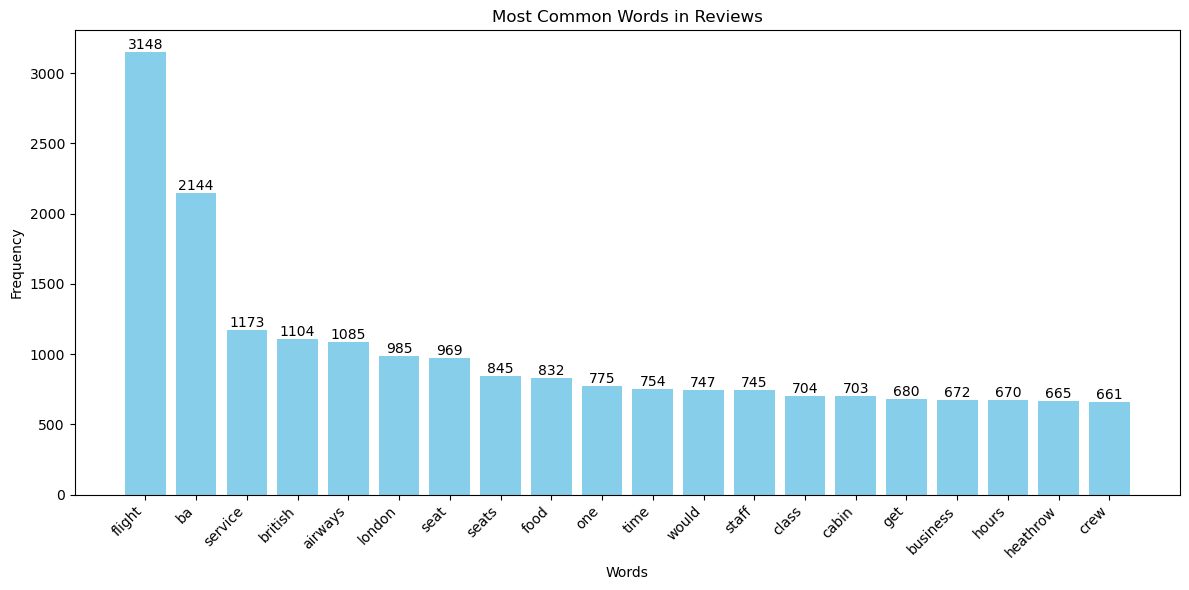

In [101]:
# Import required libraries
import matplotlib.pyplot as plt
from collections import Counter
import string
from nltk.corpus import stopwords

# First download the stopwords
import nltk
nltk.download('stopwords')


# Filter only negative sentiment reviews
negative_reviews = df[df['vader_prediction'] == 'negative']

# Combine all reviews into a single string and clean the text
text = ' '.join(negative_reviews['reviews'].astype(str))


# Remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in text.split() if word not in stop_words]

# Create word frequency counter
word_counts = Counter(words)

# Get top 20 most common words
most_common_words = dict(word_counts.most_common(20))

# Create the plot
plt.figure(figsize=(12, 6))
plt.bar(most_common_words.keys(), most_common_words.values(), color='skyblue')

# Customize the plot
plt.title('Most Common Words in Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, (word, count) in enumerate(most_common_words.items()):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# Insights

    From this word count plot for negative reviews, it is possible to observe that the dominate customer complaints is related to  "flight", 
    Service concerns rank third with 1,173 mentions, 
    Comfort issues are highlighted through frequent mentions of "seat/seats," while service aspects like "food," "staff," "class," and "crew" also appear prominently. 
    This word frequency pattern clearly identifies key areas requiring improvement, particularly in flight operations, service quality, and passenger comfort.

In [68]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   --------- ------------------------------ 71.7/301.4 kB 2.0 MB/s eta 0:00:01
   ------------------------------- -------- 235.5/301.4 kB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 301.4/301.4 kB 2.7 MB/s eta 0:00:00


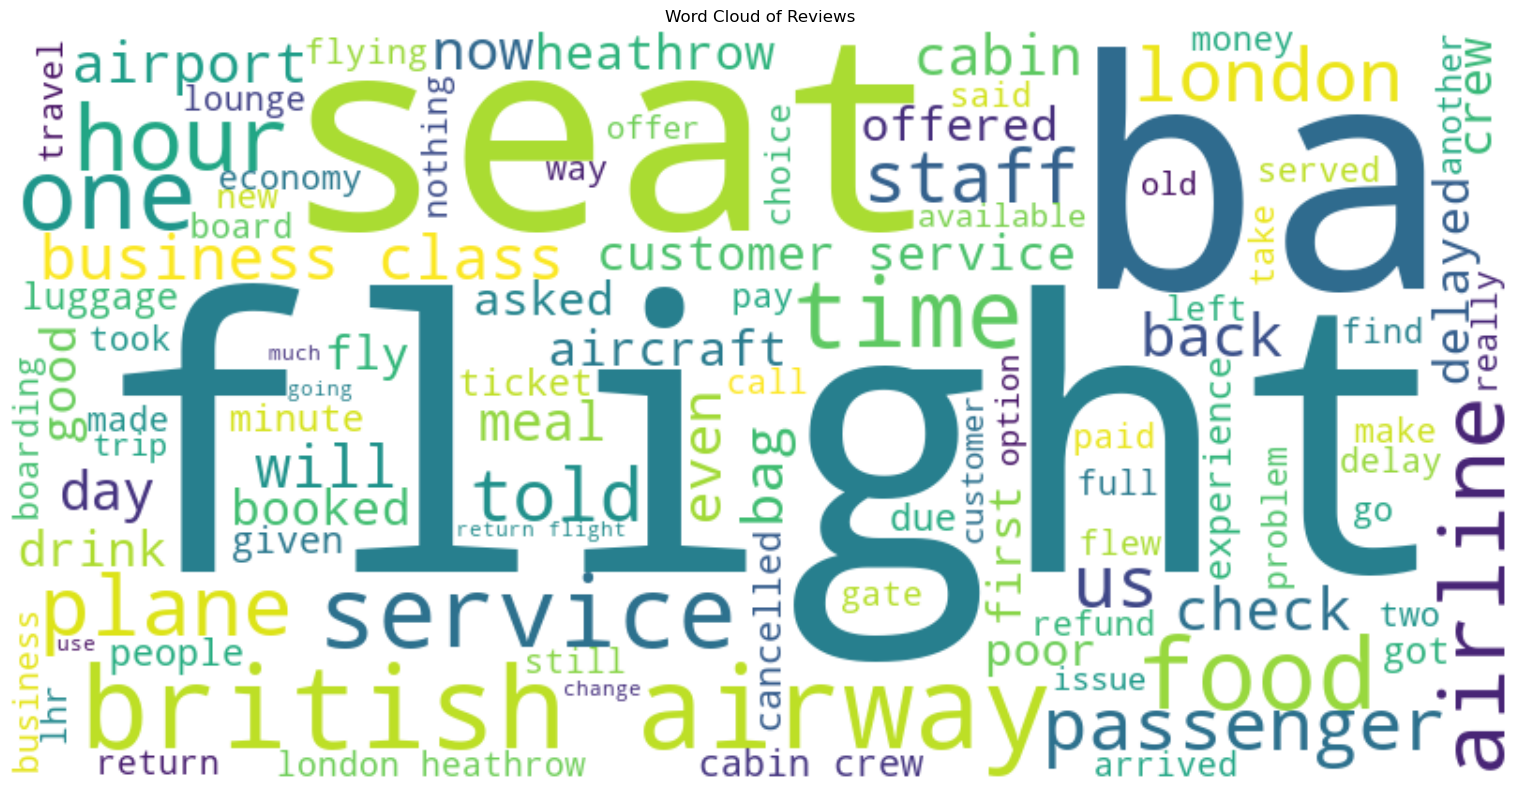

In [102]:
# Import required libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string

# Combine all reviews into a single string and clean the text


# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, 
                     background_color='white',
                     max_words=100).generate(text)

# Display the word cloud
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.tight_layout(pad=0)
plt.show()
